In [220]:
# Linear algebra and data manipulation imports
import pandas as pd
import numpy  as np

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('dark_background')
%matplotlib inline

In [221]:
DATA_DIR='../data/'

# Import raw train data and test data
train = pd.read_csv(DATA_DIR + 'raw_titanic_train.csv')
test = pd.read_csv(DATA_DIR + 'raw_titanic_test.csv')

Note that *Survived*, *Pclass*, *Sex* and *Embarked* are categorical variables here. So we need dummy variables to represent each category using one-hot encoding and avoiding full correlation between the correlations (a category is omitted to prevent full correlation)


**Representations**

*Survived*: perfect, 1 represents survived and 0 represents not-survived

*PClass*: 1 represents 'First Class', 2 represents 'Second Class' and 3 represents 'Third Class'

*Sex*: Male and female

*Embarked*: C represents 'Cherbourg', S represents 'Southampton' and Q represents 'Queenstown'

In [222]:
# Check info of raw train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [223]:
# Check first 30 rows of raw train data set
train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [224]:
# Check shape of raw train dataset
train.shape

(891, 12)

In [225]:
# Show description of raw train dataset for numerical columns
# (may include some categorical columns as well)
train.describe()

# Note that 'Survived' and 'Pclass' shown are categorical variables and not numerical

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [226]:
# Check info of raw test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [227]:
# Check first 30 rows of raw test data set
test.head(30)

# Has same columns as the train data except the label, 'Survived' is out

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [228]:
# Check the dimensions (row count) of the raw test data
test.shape

(418, 11)

In [229]:
# Show the description of the raw test data, excluding non-numeric columns
test.describe()

# Note that Pclass' shown is a categorical variable

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

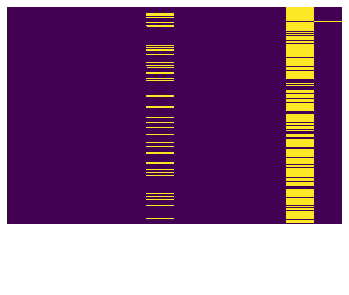

In [230]:
# Visualize null values in raw train data

sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

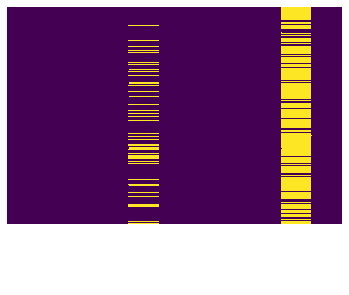

In [231]:
# Visualize null values in raw test data

sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

/Users/ayomide.bakare/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Survived and Not Survived')

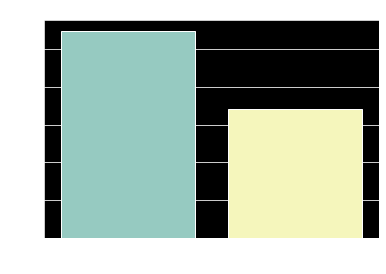

In [232]:
# Visualizing classification label 'Survived'

sns.countplot(train['Survived'])
plt.title('Count of Survived and Not Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

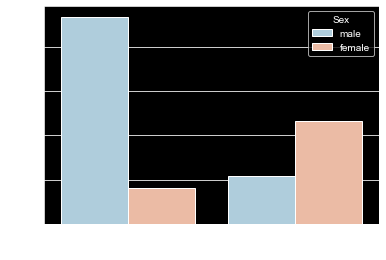

In [233]:
# Visualizing classification label 'Survived' for 'Sex' feature

sns.countplot(x='Survived',data=train,hue='Sex',palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

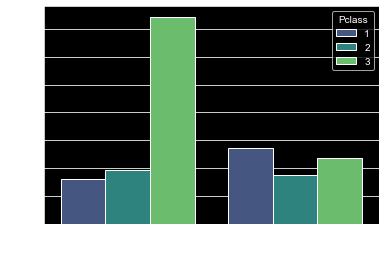

In [234]:
# Visualizing classification label 'Survived' for 'Pclass' feature

sns.countplot(x='Survived',data=train,hue='Pclass',palette='viridis')

<AxesSubplot:ylabel='Frequency'>

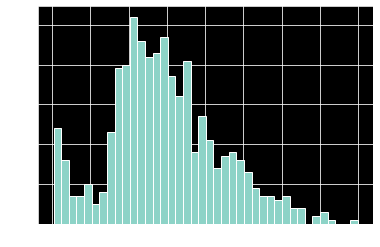

In [235]:
# sns.distplot(train['Age'].dropna(),kde=False,bins=30)

train['Age'].dropna().plot.hist(bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

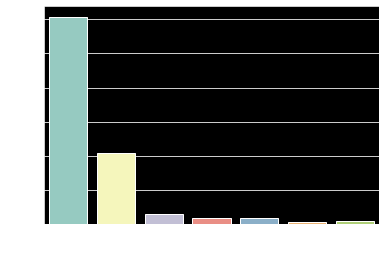

In [236]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

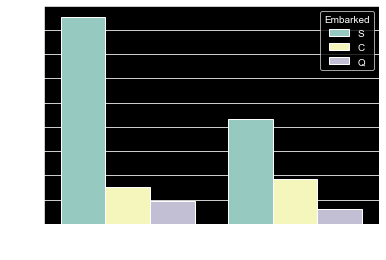

In [237]:
sns.countplot(x='Survived', data=train, hue='Embarked')

# it looks like many passenger embarked from Southampton.
# Nonetheless, this distribution does not clearly show any relevant correlation between embarkation and survival.

/Users/ayomide.bakare/opt/anaconda3/envs/py3.8/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare'>

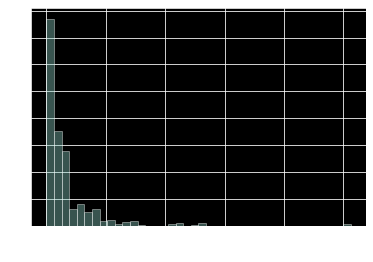

In [238]:
sns.distplot(train['Fare'],kde=False,bins=40)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

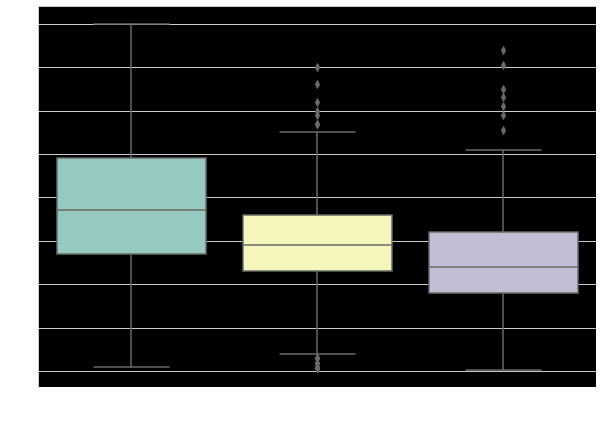

In [239]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

<AxesSubplot:>

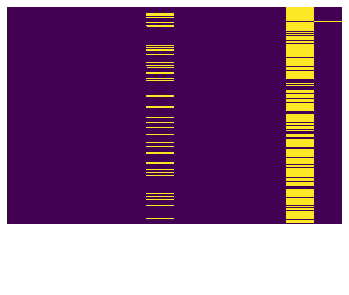

In [240]:
# Visualize null values in raw train data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [241]:
import re

# feature engineering on Name feature. It looks like the user title could have an effect on Survival
def eng_name(data):
    data['Title'] = data['Name'].apply(lambda name: re.split('[,.]+ *', name)[1])

def impute_age(data):
    """
    helper method to perform imputation on Age
    :param data: train or test data
    :return: None
    """
    Pclass1Mean = data['Age'][data['Pclass'] == 1].mean()
    Pclass2Mean = data['Age'][data['Pclass'] == 2].mean()
    Pclass3Mean = data['Age'][data['Pclass'] == 3].mean()

    def _impute(cols):
        Age = cols[0]
        Pclass = cols[1]

        if (pd.isnull(Age)):
            if Pclass == 1:
                return Pclass1Mean
            elif Pclass == 2:
                return Pclass2Mean
            else:
                return Pclass3Mean
        else:
            return Age

    data['Age'] = data[['Age', 'Pclass']].apply(_impute,axis=1)

In [242]:
# perform imputation on train data
impute_age(train)
eng_name(train)

<AxesSubplot:>

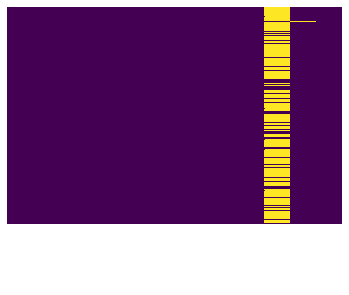

In [243]:
# Visualize null values in raw train data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [244]:
# Cabin has to many missing values, could make it categorical as Cabin Available vs Cabin Inavailable
train.drop('Cabin',axis=1,inplace=True)

In [245]:
# Imput (one) missing value for Fare column. The culprit is a male and third class passenger
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

<AxesSubplot:>

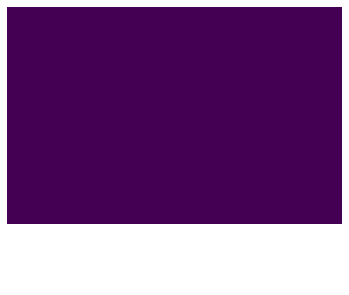

In [246]:
# Visualize null values in raw train data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [247]:
# save clean train data to csv file

train.to_csv(DATA_DIR + 'clean_titanic_train.csv',index=False)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

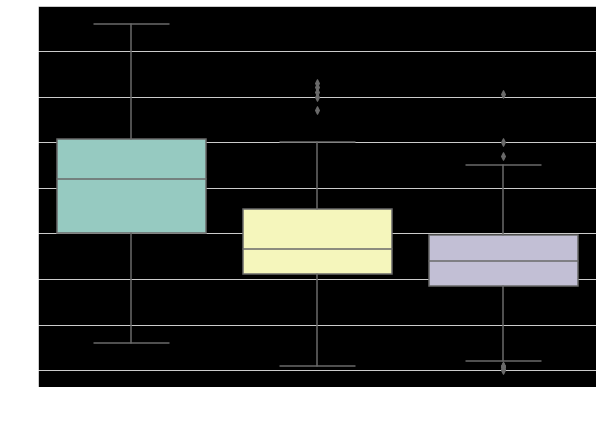

In [248]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=test)

In [249]:
# Impute missing age values in test dataset
impute_age(test)
eng_name(test)

# Imput (one) missing value for Fare column. The culprit is a male and third class passenger
test['Fare'] = test['Fare'].fillna(test['Fare'][(test['Pclass'] == 3) & (test['Sex'] == 'male')].mean())

# Cabin has to many missing values, could make it categorical as Cabin Available vs Cabin Inavailable
test.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

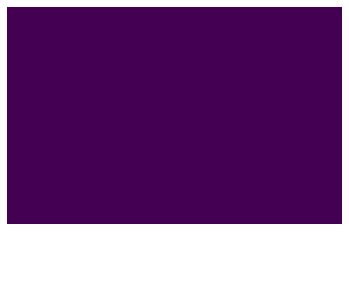

In [250]:
# Visualize null values in raw test data
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [251]:
# save clean test data to csv file
test.to_csv(DATA_DIR + 'clean_titanic_test.csv',index=False)
